In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv("/content/drive/MyDrive/DU Data Analytics Course/Project_4/project_4_car_sale_pricing_models/Resources/categorical.csv")

In [3]:
df

,Unnamed: 0,make,model,body,state,color,interior,condition,mileage,car_age,sellingprice
0,0,0,0,0,0,0,0,0,0,0,21500.0
1,1,0,0,0,0,0,1,0,1,0,21500.0
2,2,1,1,1,0,1,0,1,1,2,30000.0
3,3,2,2,1,0,0,0,1,0,1,27750.0
4,4,1,3,1,0,1,0,1,1,1,67000.0
...,...,...,...,...,...,...,...,...,...,...,...
533643,558832,0,26,1,16,4,0,1,0,1,33000.0
533644,558833,25,213,6,28,0,0,0,0,4,30800.0
533645,558834,1,41,0,0,2,0,1,0,4,34000.0
533646,558835,3,4,1,13,0,0,2,0,1,11100.0


In [4]:
df.dtypes

Unnamed: 0        int64
make              int64
model             int64
body              int64
state             int64
color             int64
interior          int64
condition         int64
mileage           int64
car_age           int64
sellingprice    float64
dtype: object

In [5]:
df["mileage"].value_counts()

0    385564
4    112634
1     22813
3     10293
2      2344
Name: mileage, dtype: int64

In [6]:
features = ['make', 'model', 'body', 'condition', 'color', 'interior', 'sellingprice', 'car_age', 'mileage']

In [7]:
df.dropna(subset=features, inplace=True)

In [8]:
df = pd.get_dummies(df, columns=['make', 'model', 'body', 'condition', 'color', 'interior', 'mileage'])

In [9]:
df.head()

,Unnamed: 0,state,car_age,sellingprice,make_0,make_1,make_2,make_3,make_4,make_5,...,interior_0,interior_1,interior_2,interior_3,interior_4,mileage_0,mileage_1,mileage_2,mileage_3,mileage_4
0,0,0,0,21500.0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,0,21500.0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,2,0,2,30000.0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,3,0,1,27750.0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,4,0,1,67000.0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [10]:
X = df.drop(['sellingprice', 'state'], axis=1)
y = df['sellingprice']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
k = 5
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [14]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 14681263.181060996


In [18]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 2416.541969455636


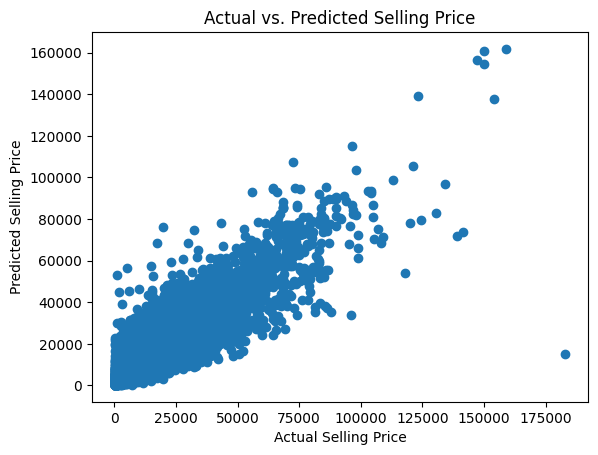

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Price')
plt.show()